# Analysis of predictions by DNABERT

In [1]:
import pandas as pd

/home/elwazi_mru/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df_sequences=pd.read_csv("../DNABERT/examples/dhs2/heart_specific_dhs_sequences.tsv", sep="\t")[["dhs_id","sequence"]]
df_sequences

,dhs_id,sequence
0,chr1_181400_181564_181490,cgcccaggggaggaggcgtggcgcaggcgcagagaggcgcgccgtg...
1,chr1_629160_629310_629230,CACAAACATTATTATAATAAACACCCTCACCACTACAATCTTCCTA...
2,chr1_629520_629596_629590,ccatccctgagaatccaaaattctccgtgccacctatcacacccca...
3,chr1_629870_630020_629930,CAATATACTCTCCGGACAATGAACCATAACCAATACCACCAATCAA...
4,chr1_630181_630319_630270,ACTCCTCAATTACCCACATAGGATGAATAACAGCAGTTCTACCGTA...
...,...,...
93901,chrY_19354160_19354375_19354270,tgtgagctgttctgaaaaacttgtgactatgcgtggcctgggacct...
93902,chrY_19567050_19567360_19567210,CTAGAACGTTGCATTACGCTCCAATCCCGAGCAGGTCCAGAGAGCC...
93903,chrY_19744660_19745060_19744810,TAGCTGCTTACCAATCGTCAGGGATCCTAGTTTTACAGCCACCATC...
93904,chrY_20575532_20575800_20575670,GGGCCCCGCCCATTTCATCCTTGACTCCACCTTCTCCATGCTGAGT...


In [3]:
df_kmers=pd.read_csv("../DNABERT/examples/dhs2/ft/6/heart_specific_dhs_6mers_with_dhs_ids.tsv", sep="\t").rename(columns={'sequence': 'kmers'})
df_kmers

,dhs_id,sequence_6mers,label
0,chr1_181400_181564_181490,cgccca gcccag cccagg ccaggg cagggg agggga gggg...,0
1,chr1_629160_629310_629230,CACAAA ACAAAC CAAACA AAACAT AACATT ACATTA CATT...,0
2,chr1_629520_629596_629590,ccatcc catccc atccct tccctg ccctga cctgag ctga...,0
3,chr1_629870_630020_629930,CAATAT AATATA ATATAC TATACT ATACTC TACTCT ACTC...,0
4,chr1_630181_630319_630270,ACTCCT CTCCTC TCCTCA CCTCAA CTCAAT TCAATT CAAT...,0
...,...,...,...
93901,chrY_19354160_19354375_19354270,tgtgag gtgagc tgagct gagctg agctgt gctgtt ctgt...,1
93902,chrY_19567050_19567360_19567210,CTAGAA TAGAAC AGAACG GAACGT AACGTT ACGTTG CGTT...,0
93903,chrY_19744660_19745060_19744810,TAGCTG AGCTGC GCTGCT CTGCTT TGCTTA GCTTAC CTTA...,0
93904,chrY_20575532_20575800_20575670,GGGCCC GGCCCC GCCCCG CCCCGC CCCGCC CCGCCC CGCC...,0


In [4]:
import numpy as np

array = np.load("../DNABERT/examples/dhs2/result/6/pred_results.npy")
# Convert the numpy array to a pandas DataFrame with a single column named 'Prediction'
df_preds = pd.DataFrame(array, columns=['preds'])
df_preds

#np.savetxt('./dhs/result/6/pred_results.tsv', array, delimiter='\t')


,preds
0,0.016428
1,0.000808
2,0.002044
3,0.001218
4,0.003277
...,...
93901,0.016428
93902,0.006867
93903,0.001790
93904,0.003249


In [5]:
df_preds_final=pd.merge(df_sequences, df_kmers, on="dhs_id")


In [6]:
df_combined = pd.concat([df_preds_final, df_preds], axis=1)
df_combined

,dhs_id,sequence,sequence_6mers,label,preds
0,chr1_181400_181564_181490,cgcccaggggaggaggcgtggcgcaggcgcagagaggcgcgccgtg...,cgccca gcccag cccagg ccaggg cagggg agggga gggg...,0,0.016428
1,chr1_629160_629310_629230,CACAAACATTATTATAATAAACACCCTCACCACTACAATCTTCCTA...,CACAAA ACAAAC CAAACA AAACAT AACATT ACATTA CATT...,0,0.000808
2,chr1_629520_629596_629590,ccatccctgagaatccaaaattctccgtgccacctatcacacccca...,ccatcc catccc atccct tccctg ccctga cctgag ctga...,0,0.002044
3,chr1_629870_630020_629930,CAATATACTCTCCGGACAATGAACCATAACCAATACCACCAATCAA...,CAATAT AATATA ATATAC TATACT ATACTC TACTCT ACTC...,0,0.001218
4,chr1_630181_630319_630270,ACTCCTCAATTACCCACATAGGATGAATAACAGCAGTTCTACCGTA...,ACTCCT CTCCTC TCCTCA CCTCAA CTCAAT TCAATT CAAT...,0,0.003277
...,...,...,...,...,...
93901,chrY_19354160_19354375_19354270,tgtgagctgttctgaaaaacttgtgactatgcgtggcctgggacct...,tgtgag gtgagc tgagct gagctg agctgt gctgtt ctgt...,1,0.016428
93902,chrY_19567050_19567360_19567210,CTAGAACGTTGCATTACGCTCCAATCCCGAGCAGGTCCAGAGAGCC...,CTAGAA TAGAAC AGAACG GAACGT AACGTT ACGTTG CGTT...,0,0.006867
93903,chrY_19744660_19745060_19744810,TAGCTGCTTACCAATCGTCAGGGATCCTAGTTTTACAGCCACCATC...,TAGCTG AGCTGC GCTGCT CTGCTT TGCTTA GCTTAC CTTA...,0,0.001790
93904,chrY_20575532_20575800_20575670,GGGCCCCGCCCATTTCATCCTTGACTCCACCTTCTCCATGCTGAGT...,GGGCCC GGCCCC GCCCCG CCCCGC CCCGCC CCGCCC CGCC...,0,0.003249


In [7]:
df_combined.columns

Index(['dhs_id', 'sequence', 'sequence_6mers', 'label', 'preds'], dtype='object')

# Analysis of results 

## 1. Accuracy and Confusion Matrix

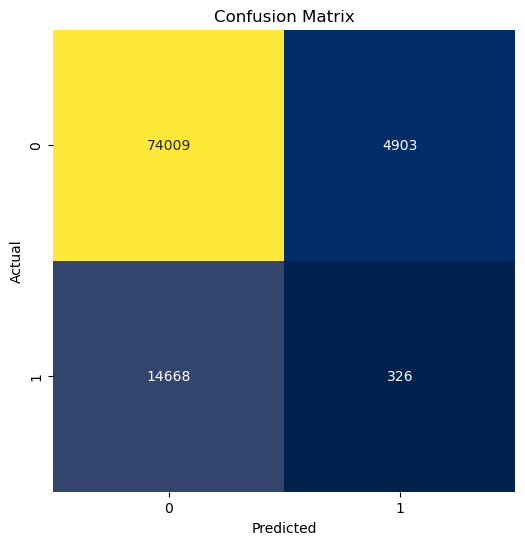

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_combined is your DataFrame with 'label' and 'preds' columns
cm = confusion_matrix(df_combined['label'], df_combined['preds'].round())

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## 2. ROC Curve and AUC for Model Performance

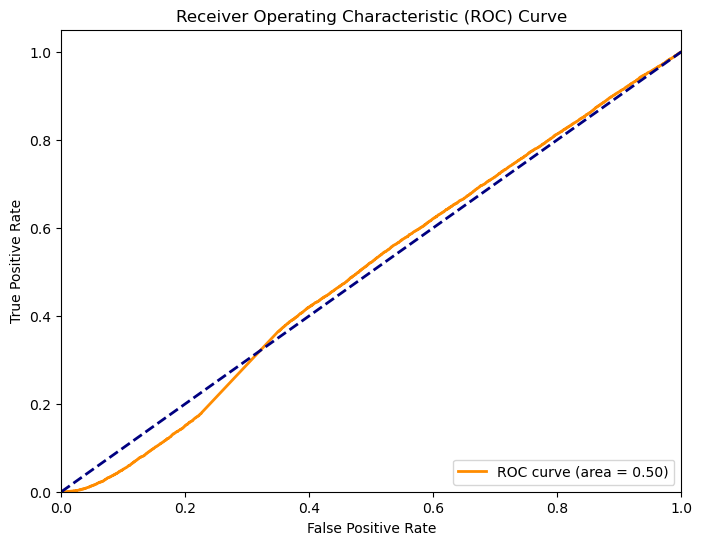

In [9]:
from sklearn.metrics import roc_curve, auc

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(df_combined['label'], df_combined['preds'])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## 3. Analysis of Top Predicted DHSs

In [10]:
# Filter df_combined for entries where preds >= 0.9 and label == 1
top_predicted_dhs = df_combined[(df_combined['preds'] >= 0.9) & (df_combined['label'] == 1)]

print("Top Predicted DHSs with preds >= 0.9 and label == 1:")
print(top_predicted_dhs[['dhs_id', 'label', 'preds']])

Top Predicted DHSs with preds >= 0.9 and label == 1:
                                   dhs_id  label     preds
20              chr1_921159_921321_921250      1  0.998319
580       chr1_10495176_10495360_10495270      1  0.999709
1038      chr1_18907056_18907253_18907150      1  0.999855
1099      chr1_19644140_19644340_19644250      1  0.929968
1818      chr1_29236378_29236580_29236470      1  0.999829
...                                   ...    ...       ...
91679  chr9_127545740_127546000_127545870      1  0.945809
91779  chr9_128203249_128203460_128203350      1  0.999758
92648     chrX_12978700_12979040_12978850      1  0.999440
93012     chrX_45775056_45775260_45775150      1  0.945932
93633  chrX_130174077_130174280_130174170      1  0.999047

[190 rows x 3 columns]


## 4. Visualize the Genomic Distribution of Top Predicted DHSs

/tmp/ipykernel_86237/1220934899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_predicted_dhs[['Chr', 'start', 'end', 'summit']] = top_predicted_dhs['dhs_id'].str.split('_', expand=True)
/tmp/ipykernel_86237/1220934899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_predicted_dhs[['Chr', 'start', 'end', 'summit']] = top_predicted_dhs['dhs_id'].str.split('_', expand=True)
/tmp/ipykernel_86237/1220934899.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

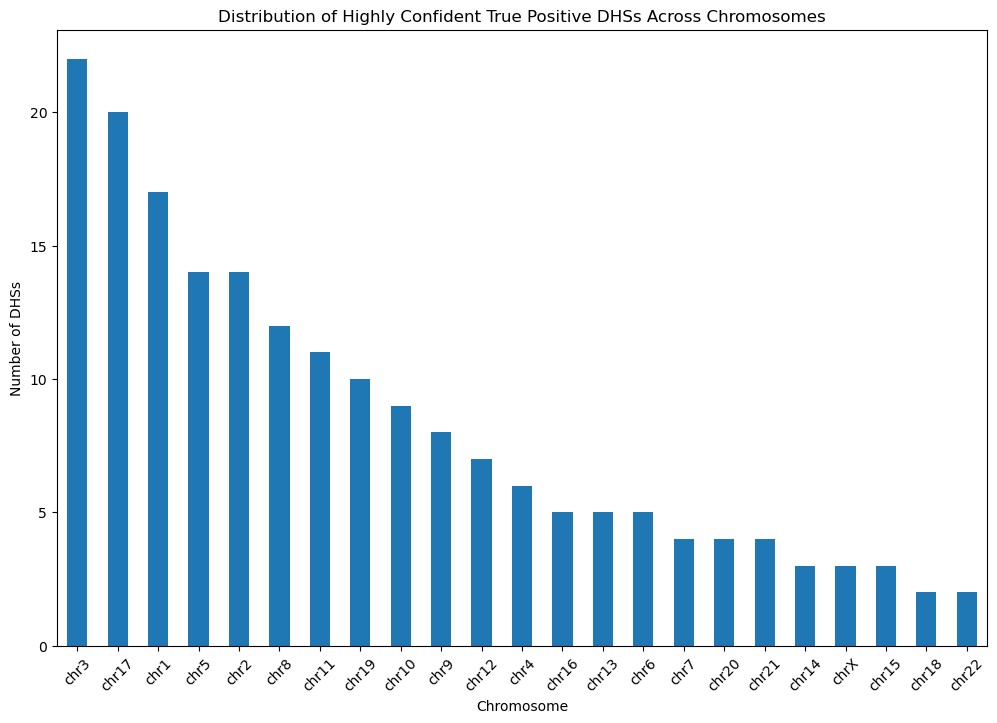

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Split 'dhs_id' into 'Chr', 'start', 'end', 'summit'
top_predicted_dhs[['Chr', 'start', 'end', 'summit']] = top_predicted_dhs['dhs_id'].str.split('_', expand=True)

# Count the number of DHSs per chromosome ('Chr')
dhs_per_chr = top_predicted_dhs['Chr'].value_counts()

plt.figure(figsize=(12, 8))
dhs_per_chr.plot(kind='bar')
plt.title('Distribution of Highly Confident True Positive DHSs Across Chromosomes')
plt.xlabel('Chromosome')
plt.ylabel('Number of DHSs')
plt.xticks(rotation=45)
plt.show()


## 5. Prepare data for Functional Enrichment Analysis

In [12]:
# Remove 'chr' prefix from the 'Chr' column
top_hits=top_predicted_dhs.copy()

In [14]:
top_hits[['Chr', 'start', 'end']].to_csv('../DNABERT/examples/dhs2/top_dhs_regions.txt', sep='\t', index=False, header=False)
top_hits[['Chr', 'start', 'end']]

,Chr,start,end
20,chr1,921159,921321
580,chr1,10495176,10495360
1038,chr1,18907056,18907253
1099,chr1,19644140,19644340
1818,chr1,29236378,29236580
...,...,...,...
91679,chr9,127545740,127546000
91779,chr9,128203249,128203460
92648,chrX,12978700,12979040
93012,chrX,45775056,45775260


## 6. Submit the top results to the [GREAT Functional Enrichment site](https://great.stanford.edu/great/public/html/)

## 7. Analyse results from GREAT

In [15]:
import pandas as pd

# Replace 'great_output.txt' with the path to your GREAT output file
great_output_df = pd.read_csv('../DNABERT/examples/dhs2/greatExportAll.tsv', skiprows=3, sep='\t')  # Adjust separator if needed

# Display the first few rows to verify
print(great_output_df)

                       # Ontology     ID    Desc BinomRank        BinomP  \
0                   Ensembl Genes   9161   CTXN1         1  9.702552e-07   
1                   Ensembl Genes  17648  CHRNA2         2  5.931554e-05   
2                   Ensembl Genes  17647   PTK2B         3  6.097022e-05   
3                   Ensembl Genes   1847   CAPN2         4  6.269552e-05   
4                   Ensembl Genes  17801  ADHFE1         5  7.046778e-05   
...                           ...    ...     ...       ...           ...   
3289      # GO Cellular Component   1667       1      1000           NaN   
3290      # GO Molecular Function   4174       1      1000           NaN   
3291            # Human Phenotype   6643       1      1000           NaN   
3292  # Mouse Phenotype Single KO   9071       1      1000           NaN   
3293            # Mouse Phenotype   9438       1      1000           NaN   

      BinomBonfP  BinomFdrQ  RegionFoldEnrich  ExpRegions  ObsRegions  ...  \
0       0

In [16]:
# Define heart-related keywords
heart_keywords = ['heart', 'cardiac', 'cardiovascular', 'atrium', 'ventricle', 'myocardial', 'coronary']

# Filter rows where any of the heart_keywords appear in the 'Desc' column
heart_related_rows = great_output_df[great_output_df['Desc'].str.contains('|'.join(heart_keywords), case=False, na=False)]

# Display heart-related rows
print(heart_related_rows)

                 # Ontology          ID  \
330   GO Biological Process  GO:0035050   
335   GO Biological Process  GO:0003143   
348   GO Biological Process  GO:0001947   
354   GO Biological Process  GO:0061371   
372   GO Biological Process  GO:0072358   
...                     ...         ...   
3238        Mouse Phenotype  MP:0010435   
3249        Mouse Phenotype  MP:0010563   
3273        Mouse Phenotype  MP:0012751   
3274        Mouse Phenotype  MP:0010021   
3280        Mouse Phenotype  MP:0002754   

                                                   Desc BinomRank    BinomP  \
330                    embryonic heart tube development         2  0.000291   
335                  embryonic heart tube morphogenesis         7  0.000518   
348                                       heart looping        20  0.001712   
354         determination of heart left/right asymmetry        26  0.002249   
372                   cardiovascular system development        44  0.004431   
...      

In [17]:
heart_related_rows["Desc"].unique()

array(['embryonic heart tube development',
       'embryonic heart tube morphogenesis', 'heart looping',
       'determination of heart left/right asymmetry',
       'cardiovascular system development', 'cardiac chamber development',
       'fibrous ring of heart morphogenesis',
       'positive regulation of cardiac ventricle development',
       'heart development',
       'regulation of cardiac muscle cell proliferation',
       'ventricular cardiac muscle cell differentiation',
       'cardiac chamber morphogenesis', 'cardiac septum development',
       'regulation of cardiac muscle tissue growth',
       'cardiac neural crest cell development involved in outflow tract morphogenesis',
       'heart morphogenesis',
       'cardiac neural crest cell development involved in heart development',
       'regulation of cardiac muscle tissue development',
       'negative regulation of heart looping',
       'negative regulation of cardiac chamber formation',
       'regulation of heart gr